In [1]:
#NOTE: Only works for relatively small phase differences
#NOTE: May not work perfectly with freq drift as well, we calculate lag with an average freq

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from nsdmd import utils
from nsdmd import nsdmd

In [2]:
sr = 1000
f1 = 17
t1 = np.arange(2000)
f2 = 30
t2 = np.arange(2000)

coupling = np.ones(3*len(t1))
for i in range(0,len(coupling),200):
    coupling[i:i+100] = 0
coupling[3000:]=0
net1, F1_true, c1 = utils.make_network(f1, len(t1), \
                    np.hstack([i*np.ones(50) for i in [1,2]]), \
                    np.hstack([i*np.ones(10, dtype=int) for i in [int(j) for j in np.linspace(-25,25,10)]]),\
                    sr,
                    coupling=coupling)
net2, F2_true, c2 = utils.make_network(f2, len(t2), \
                    np.hstack([i*np.ones(50) for i in [2,1]]), \
                    np.hstack([i*np.ones(10, dtype=int) for i in [int(j) for j in np.linspace(-10,50,10)]]),
                    sr)
x = np.zeros((100,2000))
x[:,t1] += net1
x[:,t2] += net2
x = utils.add_noise(x, std=0.1)
t = np.arange(x.shape[1]) / sr

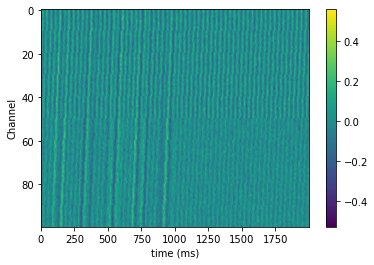

In [3]:
plt.imshow(x, aspect='auto')
plt.colorbar()
plt.xlabel('time (ms)')
plt.ylabel('Channel')
plt.savefig('recentImage')

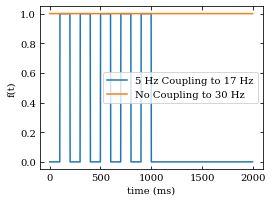

In [5]:
plt.rc('font', family='serif')

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both',which='both',direction='in',right=True,top=True)

ax.plot(c1, label='5 Hz Coupling to '+str(f1)+' Hz')
ax.plot(c2, label='No Coupling to '+str(f2)+' Hz')
ax.legend()
ax.set_xlabel('time (ms)')
ax.set_ylabel('f(t)')
plt.savefig('figs/individual_mod.svg', bbox_inches='tight')

In [6]:
model = nsdmd.NSDMD(opt_rank=4, sim_thresh_phi_amp=0.95, grad_N=3, grad_fit_coupling=True)
model.fit_opt(x, t, sr)

In [7]:
model.fit_reduction(x, len(t), sr)

Text(0, 0.5, 'Cosine Distance')

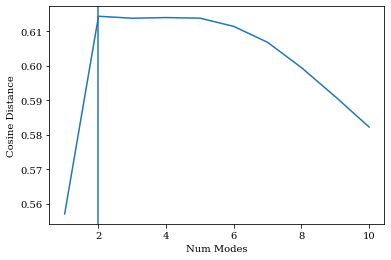

In [8]:
plt.plot(model.num_modes_, model.errors_)
plt.axvline(2)
plt.xlabel('Num Modes')
plt.ylabel('Cosine Distance')

In [9]:
model.fit_f(x, len(t), sr, 2)

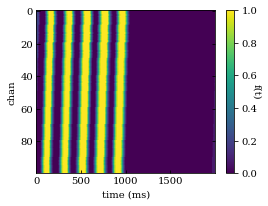

In [15]:
plt.rc('font', family='serif')

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both',which='both',direction='in',right=True,top=True)

cax = ax.matshow(model.f_hat_[1], aspect='auto', vmin=0, vmax=1)
cbar = fig.colorbar(cax)
cbar.set_label('f(t)', rotation=270)
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('time (ms)')
ax.set_ylabel('chan')
plt.savefig('figs/individual_f_all.svg', bbox_inches='tight')

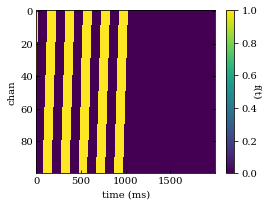

In [16]:
plt.rc('font', family='serif')

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both',which='both',direction='in',right=True,top=True)

cax = ax.matshow(F1_true, aspect='auto', vmin=0, vmax=1)
cbar = fig.colorbar(cax)
cbar.set_label('f(t)', rotation=270)
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('time (ms)')
ax.set_ylabel('chan')
plt.savefig('figs/individual_f_all_true.svg', bbox_inches='tight')

Text(0, 0.5, 'chan')

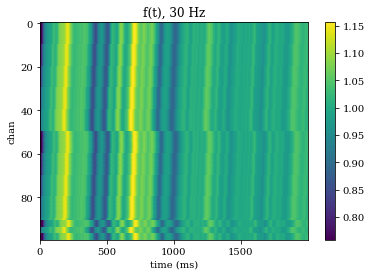

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(model.f_hat_[0], aspect='auto')
fig.colorbar(cax)
ax.xaxis.set_ticks_position('bottom')
plt.title('f(t), ' + str(round(model.freq_mean_[0])) + ' Hz')
plt.xlabel('time (ms)')
plt.ylabel('chan')

Text(0, 0.5, 'chan')

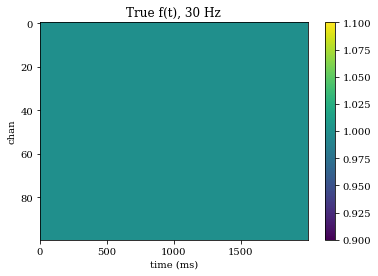

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(F2_true, aspect='auto')
fig.colorbar(cax)
ax.xaxis.set_ticks_position('bottom')
plt.title('True f(t), ' + str(f2) + ' Hz')
plt.xlabel('time (ms)')
plt.ylabel('chan')

Text(0, 0.5, 'f(t)')

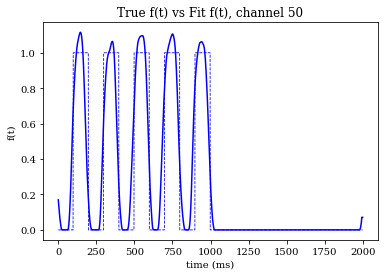

In [19]:
plt.plot(model.f_hat_[1,50], color='blue')
plt.plot(F1_true[50], linestyle='dashed', color='blue', linewidth=0.8)
plt.title('True f(t) vs Fit f(t), channel 50')
plt.xlabel('time (ms)')
plt.ylabel('f(t)')

In [20]:
model = nsdmd.NSDMD(opt_rank=4, sim_thresh_phi_amp=0.95, grad_N=3, grad_fit_coupling=False)
model.fit(x, t, sr)

In [21]:
model.fit_f(x, len(t), sr, 2)

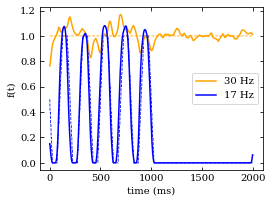

In [24]:
plt.rc('font', family='serif')

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both',which='both',direction='in',right=True,top=True)

ax.plot(np.mean(F1_true, axis=0), linestyle='dashed', color='blue', linewidth=0.8)
ax.plot(np.mean(F2_true, axis=0), linestyle='dashed', color='orange', linewidth=0.8)

ax.plot(model.f_hat_[0], color='orange', label='30 Hz')
ax.plot(model.f_hat_[1], color='blue', label='17 Hz')
ax.legend()

ax.set_xlabel('time (ms)')
ax.set_ylabel('f(t)')
plt.savefig('figs/individual_f.svg', bbox_inches='tight')

In [14]:
x_rec = model.transform(x, len(t), sr)

Text(0, 0.5, 'Channel')

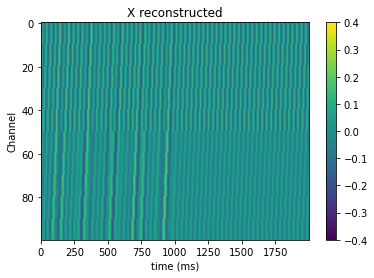

In [15]:
plt.imshow(x_rec, aspect='auto', vmin=-0.4, vmax=0.4)
plt.colorbar()
plt.title('X reconstructed')
plt.xlabel('time (ms)')
plt.ylabel('Channel')

Text(0, 0.5, 'Channel')

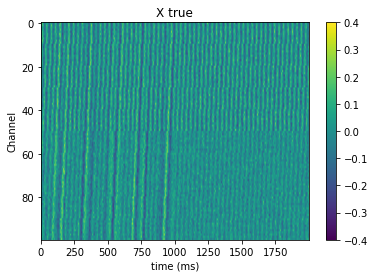

In [16]:
plt.imshow(x, aspect='auto', vmin=-0.4, vmax=0.4)
plt.colorbar()
plt.title('X true')
plt.xlabel('time (ms)')
plt.ylabel('Channel')